## Correlation_and_Regression

In [8]:
# Step 2: Load your dataset
from google.colab import files
uploaded = files.upload()

# Load the CSV file
#df = pd.read_csv('content/drive/MyDrive/DATA_SCIENCE/user_behavior_dataset.csv')

df = pd.read_csv('user_behavior_dataset.csv')

Saving user_behavior_dataset.csv to user_behavior_dataset.csv


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB
None
         User ID  App Usage Time (min/day)  Screen On Time (hours/day)  \
count  700.0

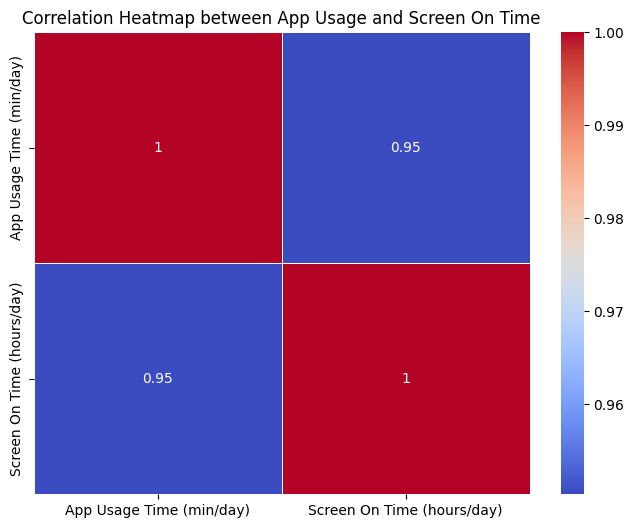

Mean Squared Error: 3168.3536734238455
Root Mean Squared Error: 56.28813083967032
Model Coefficient (Slope): 55.522377591491406
Model Intercept: -20.886218492608123


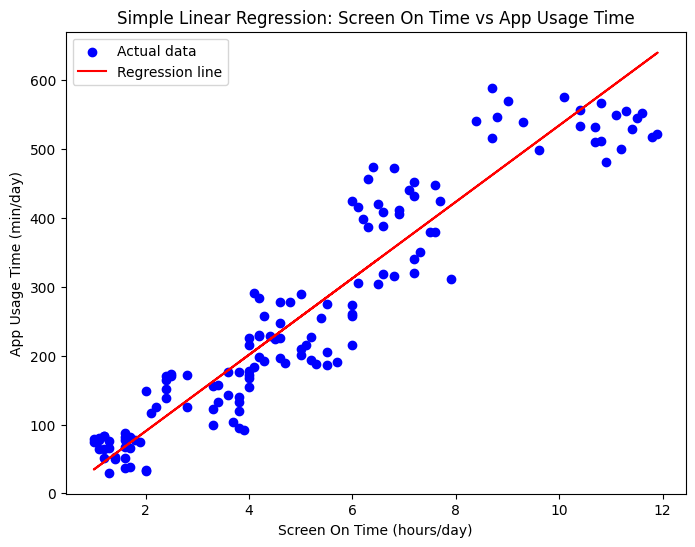

In [9]:
# Step 3: Explore the dataset structure
print(df.info())
print(df.describe())

# Step 4: Compute correlation between 'App Usage Time' and 'Screen On Time'
correlation_matrix = df[['App Usage Time (min/day)', 'Screen On Time (hours/day)']].corr()

# Step 5: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap between App Usage and Screen On Time")
plt.show()

# Step 6: Select columns for regression
X = df[['Screen On Time (hours/day)']]  # Independent variable
Y = df['App Usage Time (min/day)']      # Dependent variable

# Step 7: Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Step 8: Apply simple linear regression
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

# Step 9: Make predictions
Y_pred = regressor.predict(X_test)

# Step 10: Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)

# Display the evaluation metrics and model parameters
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Model Coefficient (Slope): {regressor.coef_[0]}")
print(f"Model Intercept: {regressor.intercept_}")

# Step 11: Plot the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_test, Y_test, color='blue', label='Actual data')
plt.plot(X_test, Y_pred, color='red', label='Regression line')
plt.title('Simple Linear Regression: Screen On Time vs App Usage Time')
plt.xlabel('Screen On Time (hours/day)')
plt.ylabel('App Usage Time (min/day)')
plt.legend()
plt.show()


In [7]:
# Step 1: Import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Naive Bayes

In [10]:
# Special libraries for Naive Bayes

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [11]:
# Step 3: Select three columns as features and the target column
# We will use 'App Usage Time (min/day)', 'Screen On Time (hours/day)', and 'Battery Drain (mAh/day)' as features
# The target column will be 'User Behavior Class'
X = df[['App Usage Time (min/day)', 'Screen On Time (hours/day)', 'Battery Drain (mAh/day)']]  # Features
Y = df['Gender']  # Target column

# Step 4: Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8, random_state=42)

# Step 5: Apply Naive Bayes (GaussianNB) model
nb_model = GaussianNB()  # Now this should work without error
nb_model.fit(X_train, Y_train)

# Step 6: Make predictions on the test set
Y_pred = nb_model.predict(X_test)

# Step 7: Evaluate the model performance
accuracy = accuracy_score(Y_test, Y_pred)
classification_rep = classification_report(Y_test, Y_pred)

# Display accuracy and classification report
print(f"Accuracy: {accuracy * 100:.2f}%")

print("Classification Report:")
print(classification_rep)

# Step 8: Display the posterior probabilities of the test set
Y_pred_proba = nb_model.predict_proba(X_test)

# Print posterior probabilities for the first 5 test instances
print("Posterior probabilities for the first 5 test instances:")

print(Y_pred_proba[:5])

Accuracy: 50.00%
Classification Report:
              precision    recall  f1-score   support

      Female       0.48      0.55      0.51       266
        Male       0.53      0.46      0.49       294

    accuracy                           0.50       560
   macro avg       0.50      0.50      0.50       560
weighted avg       0.50      0.50      0.50       560

Posterior probabilities for the first 5 test instances:
[[0.56334293 0.43665707]
 [0.37822407 0.62177593]
 [0.38613292 0.61386708]
 [0.51462597 0.48537403]
 [0.59117128 0.40882872]]
